In [162]:
!python --version
!pip freeze

Python 3.6.9
attrs==19.3.0
backcall==0.1.0
bleach==3.1.4
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
imageio==2.8.0
importlib-metadata==1.5.2
ipykernel==5.2.0
ipython==7.13.0
ipython-genutils==0.2.0
jedi==0.16.0
Jinja2==2.11.1
json5==0.9.4
jsonschema==3.2.0
jupyter-client==6.1.2
jupyter-core==4.6.3
jupyterlab==2.0.1
jupyterlab-server==1.0.7
kiwisolver==1.1.0
MarkupSafe==1.1.1
matplotlib==3.2.1
mistune==0.8.4
nbconvert==5.6.1
nbformat==5.0.4
networkx==2.4
notebook==6.0.3
numpy==1.18.2
opencv-python==4.2.0.32
pandocfilters==1.4.2
parso==0.6.2
pexpect==4.8.0
pickleshare==0.7.5
Pillow==7.0.0
pkg-resources==0.0.0
prometheus-client==0.7.1
prompt-toolkit==3.0.5
ptyprocess==0.6.0
Pygments==2.6.1
pyparsing==2.4.6
pyrsistent==0.16.0
python-dateutil==2.8.1
PyWavelets==1.1.1
pyzmq==19.0.0
scikit-image==0.16.2
scipy==1.4.1
Send2Trash==1.5.0
six==1.14.0
terminado==0.8.3
testpath==0.4.4
tornado==6.0.4
traitlets==4.3.3
wcwidth==0.1.9
webencodings==0.5.1
zipp==3.1.0


In [92]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.util import view_as_blocks
from skimage import exposure
from PIL import Image
import os

In [93]:
path = "./images"

image = None

for obj in os.listdir(path):
    image = io.imread(os.path.join(path, obj))

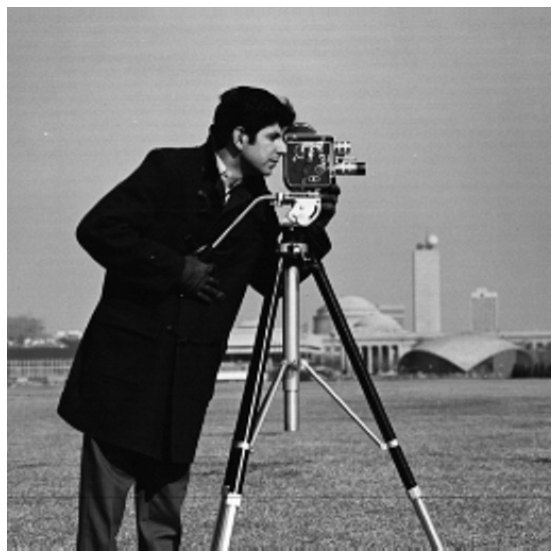

In [94]:
plt.figure(figsize = (10, 10))
plt.imshow(image, cmap = 'gray')
plt.axis("off")
plt.show()

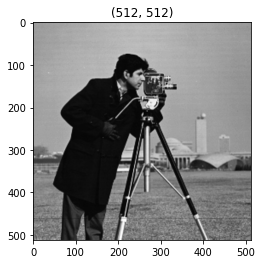

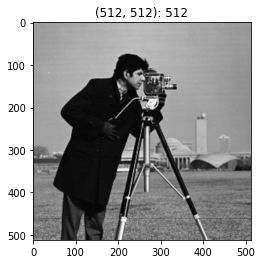

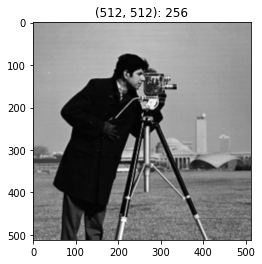

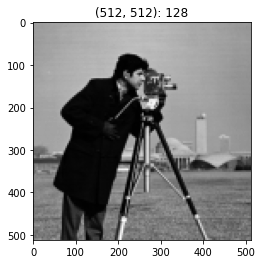

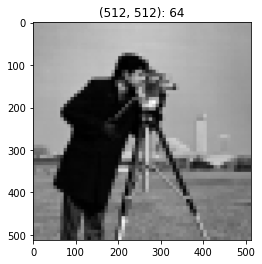

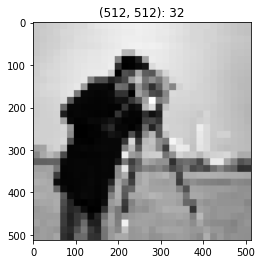

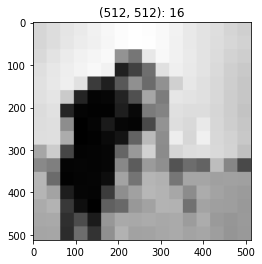

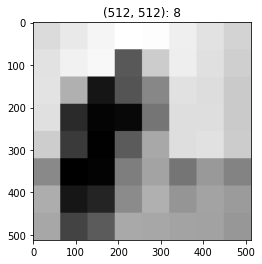

In [95]:
def divide_sizes_by_2(image, block_size = 512):
    w, h = image.shape
    block_w, block_h = w//block_size, h//block_size
    output = np.zeros(image.shape)

    for lin in range(0, w, block_w):
        for col in range(0, h, block_h):
            output[lin:lin+block_w, col:col+block_h] = np.ones((block_w, block_h))*(image[lin:lin+block_w, col:col+block_h].mean())

    return output


img = image.copy()
plt.imshow(img, cmap = 'gray')
plt.title(img.shape)
plt.show()

for block_size in [512, 256, 128, 64, 32, 16, 8]:
    img = divide_sizes_by_2(image, block_size)
    plt.imshow(img, cmap = 'gray')
    plt.title(str(img.shape) + ": " + str(block_size))
    plt.show()

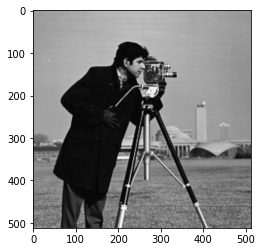

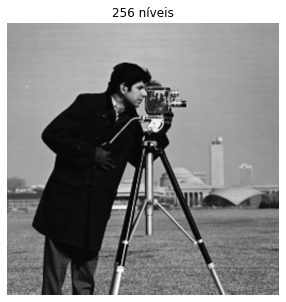

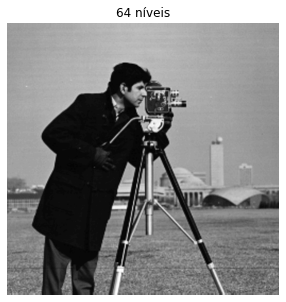

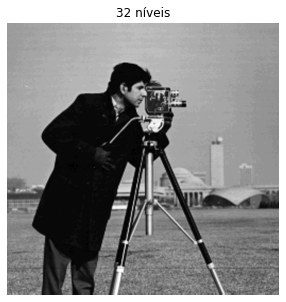

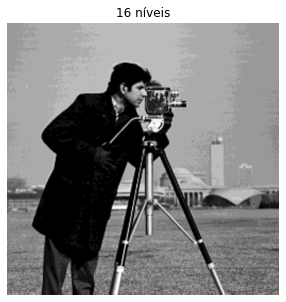

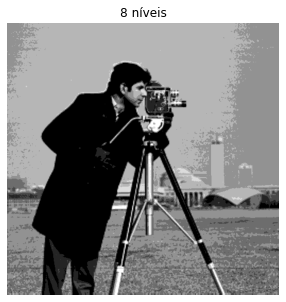

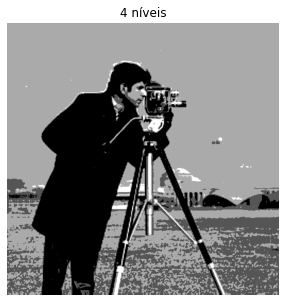

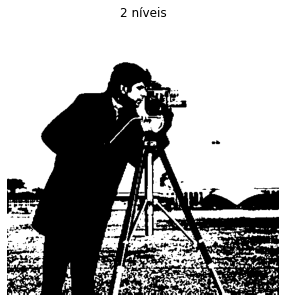

In [96]:
def quantize(image, level):
    bl = (level-1).bit_length()
    output = image >> (8 - bl)
    return output


levels = [256, 64, 32, 16, 8, 4, 2]
plt.imshow(image, cmap = 'gray')
plt.show()
for level in levels:
    plt.figure(figsize = (5, 5))
    plt.axis("off")
    plt.title(f"{level} níveis")
    img = quantize(image, level)
    # plt.savefig(img, "output/baboon-quant-"+str(level), cmap = 'gray')
    axes = plt.imshow(img, cmap = 'gray')
    # plt.colorbar(axes)
    plt.plot()

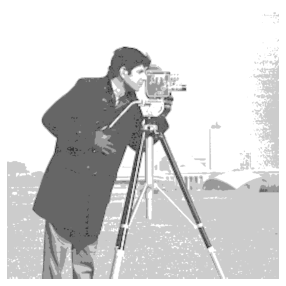

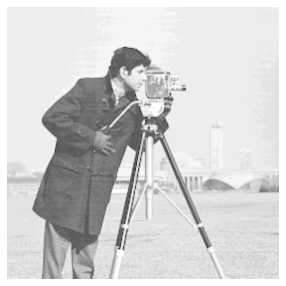

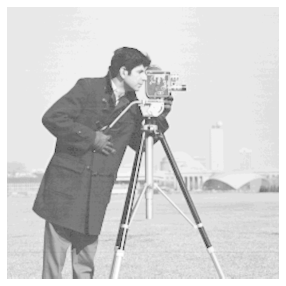

In [111]:
def log_transform(image, c = 0):
     return (c*np.log(image + 1.)).astype("uint8")


for level in [1, 5, 6]:    
    plt.figure(figsize = (5,5))
    img = log_transform(image, level)
    plt.imshow(img, cmap = 'gray')
    plt.axis("off")
    plt.show()

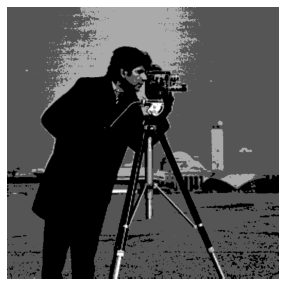

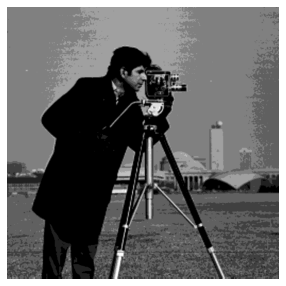

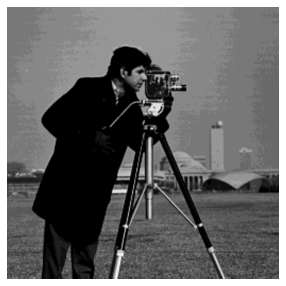

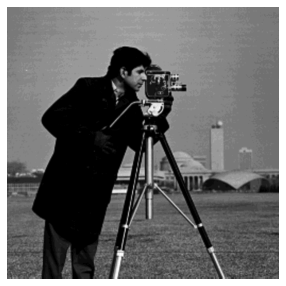

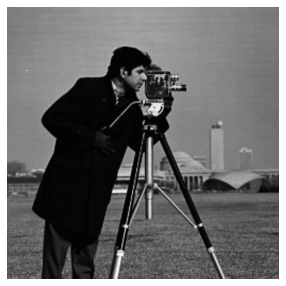

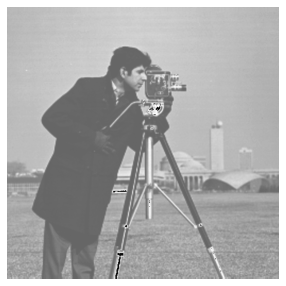

In [103]:
def exp_transform(image, c = 1):
    return (c*np.exp(image)).astype("uint8")

#img_norm = (image - image.min()) / (image.max() - image.min())
img_norm = image/255
# img_norm = exposure.rescale_intensity(image, out_range=(0, 1))

for t in [2, 5, 10, 15, 50, 100]:
    plt.figure(figsize = (5,5))
    img = exp_transform(img_norm, t)
    plt.imshow(img, cmap = 'gray')
    plt.axis("off")
    plt.show()

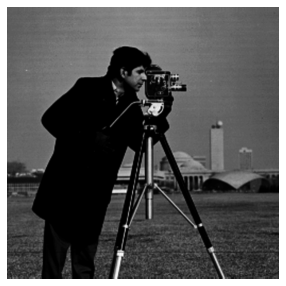

In [135]:
def square_transform(image, c = 1):
    return (c*np.square(image)).astype("uint8")


plt.figure(figsize = (5,5))
img = square_transform(img_norm, 100)
# plt.imsave(img, "./output/teste", cmap = 'gray', format = 'png')
plt.imshow(img, cmap = 'gray')
plt.axis("off")
plt.show()

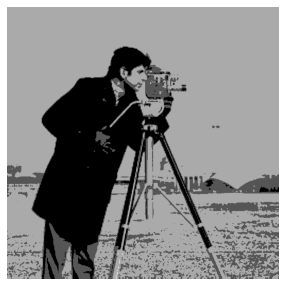

In [132]:
def square_root_transform(image, c = 1):
    return (c*np.sqrt(image)).astype("uint8")


plt.figure(figsize = (5,5))
img = square_root_transform(img_norm, 3)
# plt.imsave(img, "./output/teste", cmap = 'gray', format = 'png')
plt.imshow(img, cmap = 'gray')
plt.axis("off")
plt.show()

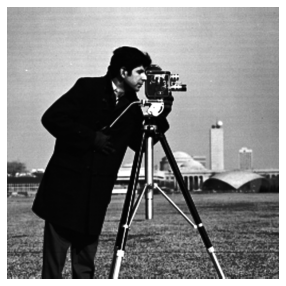

In [159]:
def adjust_contrast(image, alpha = 1, beta = 1, gamma = 1, a = 20, b = 150):
    max_value = image.max()
    output = image.copy()
    
    aux = output[((0 <= image) & (image <= a))]
    output[ ( (0 <= image) & (image <= a) ) ] = np.fmin(np.around(alpha*aux), np.full(aux.shape, 255))

    aux = output[((a < image) & (image <= b))]
    output[ ( (a < image) & (image <= b) ) ] = np.fmin(np.around(beta*(aux-np.full(aux.shape, a)) 
                                                        + alpha*np.full(aux.shape, a))
                                                , np.full(aux.shape, 255))

    
    aux = output[((b < image) & (image <= max_value))]
    output[ ( (b < image) & (image <= max_value) ) ] = np.fmin(np.around(gamma*(aux-np.full(aux.shape, b))
                                                        + beta*(np.full(aux.shape, b) - np.full(aux.shape, a))
                                                        + alpha*(np.full(aux.shape, a)))
                                                        , np.full(aux.shape, 255))

    # Aquivalente à seguinte porção de código:
    
    # for lin in range(image.shape[0]):
    #     for col in range(image.shape[1]):
    #         if 0 <= output[lin][col] and output[lin][col] <= a:
    #             output[lin][col] = min(np.around(alpha*output[lin][col]), 255)
    #         elif a < output[lin][col] and output[lin][col] <= b:
    #             output[lin][col] = min(np.around(beta*(output[lin][col]-a) + alpha*a), 255)
    #         #assume-se que essa porcao do codigo so executará quando  b < output <= max_value
    #         else:
    #             output[lin][col] = min(gamma*(output[lin][col]-b) + beta*(b - a) + alpha*a, 255)
    
    return output


plt.figure(figsize = (5,5))
img = adjust_contrast(image, alpha= 0.5, beta = 2, gamma = 2, a = 100, b = 120)
# plt.imsave(img, "./output/teste", cmap = 'gray', format = 'png')
plt.imshow(img, cmap = 'gray')
plt.axis("off")
plt.show()